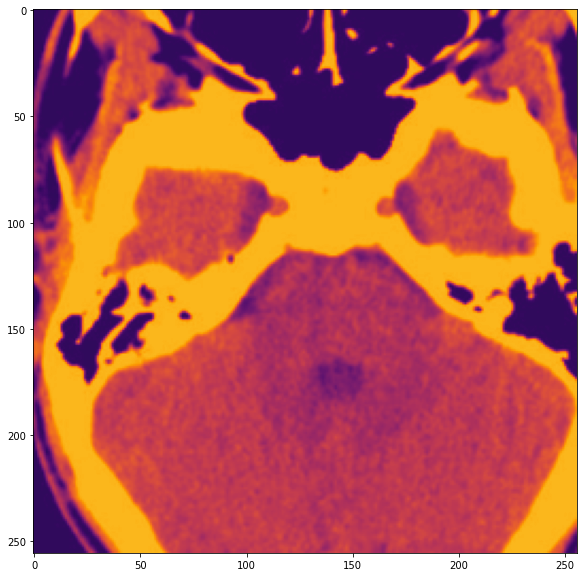

In [43]:
from tifffile import imread, imsave
import numpy as np
import matplotlib.pyplot as plt

conv_ob = imread('../results/Convallaria/signal_dependent/observation.tif')
conv_sig = np.mean(conv_ob, axis=0, keepdims=True)
conv_mmse = imread('../results/Convallaria/signal_dependent/mmse.tif')

mri_ob = imread('../results/MRI/PixelHDN/observation.tif')
mri_sig = imread('../data/MRI/signal.tif')
mri_mmse = imread('../results/MRI/PixelHDN/mmse.tif')
mri_noise = imread('../data/MRI/noise.tif')
mri_nat = imread('../results/MRI/HDN/natural/mmse.tif')


pai_ob = imread('../results/PAI/PixelHDN/observation.tif')
pai_mmse = imread('../results/PAI/HDN/structured/mmse.tif')
pai_noise = imread('../data/PAI/noise.tif')

dataset = 'mri'
idx = 29
vmin = np.percentile(globals()[dataset + '_ob'], 0.1)
vmax = np.percentile(globals()[dataset + '_ob'], 99.9)

plt.figure(figsize=[10,10])
#plt.imshow(globals()[dataset + '_ob'][idx,0], vmin=vmin, vmax=vmax, cmap='inferno')
#plt.show()
#plt.imshow(globals()[dataset + '_nat'][idx,0], vmin=vmin, vmax=vmax, cmap='inferno')
#plt.show()
#plt.imshow(globals()[dataset + '_mmse'][idx,0], vmin=vmin, vmax=vmax, cmap='inferno')
#plt.show()
plt.imshow(globals()[dataset + '_sig'][idx], vmin=vmin, vmax=vmax, cmap='inferno')


In [34]:
import torch
from tifffile import imread, imsave
import sys
sys.path.append('../')
from noise_models.PixelCNN import PixelCNN
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = PixelCNN.load_from_checkpoint('../nm_checkpoint/MRI/final_params.ckpt').to(device).eval()

img_shape=[1,1,256,256]
noise_sample = model.sample(img_shape)


done: 256: 100%|██████████████████████████████| 256/256 [12:24<00:00,  2.91s/it]


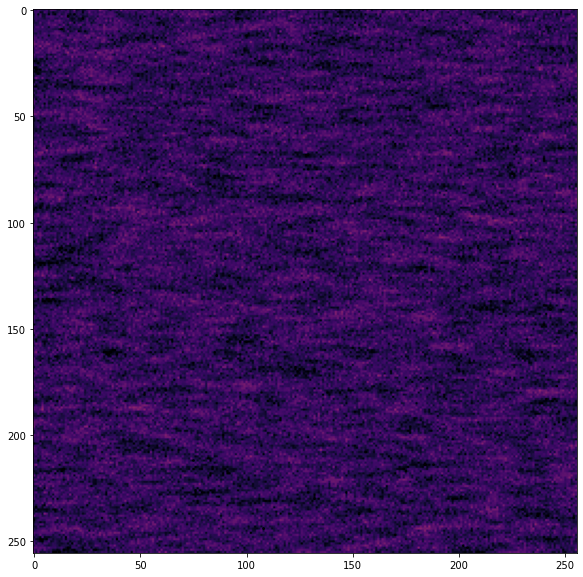

In [35]:
plt.figure(figsize=[10,10])
plt.imshow(noise_sample[0,0].cpu().numpy(), vmin=vmin, vmax=vmax, cmap='inferno')

In [44]:
!pwd

/rds/projects/k/krullaff-ibin/ben/PixelHDN/example


In [47]:
!cd ../jobs; sbatch TrainConvallariaSigDepDN_job.sh

Submitted batch job 48563528
